## <u>Contents</u>

<div class="alert alert-block alert-info" style="margin-top: 20px">

* [Motivation](#Motivation)
* [Data](#data)


## <u>Motivation</u><a name="Motivation"></a>


<p style='text-align: justify;'> One of the busiest and popular cities in the world is Los Angeles, siutated in California,United States. It is the home of Hollywoodand like New York is one of the most diverse cultural hubs in the world. The city is also known for it's fine food and enormous opportunities it offers. </p>

<p style='text-align: justify;'>However, LA is also one of the most expensive places in the world to live in. As a business opportunity it is relevant to be able to see where Los Angeles's most expensive areas are and if were to place a Greek restaurant, where the prime location would be. </p>
<p> </p>
<div style='text-align: justify;'>The main goal of this project is to identify the restaurant demographics of Los Angeles and compare it with the rental prices around the area. This will give us two possibilities, either we target an expensive neighborhood for a high end Greek Restaurant or a mid-size affordable restaurant in an area where rent is relatively cheaper. The reason I have chosen a Greek is to further introduce the cuisine in the city.</b>. </div>

<p style='text-align: justify;'>Since there are lots of restaurants in LA, neighbourhoods that are <b>not already crowded with restaurants</b> would be shortlisted. The next filter would be neighbourhoods with the <b>least number of Greek restaurants in its vicinity</b>.</p>

## <u>Data</u> <a name="data"></a>

For this project, we will be focusing on the following data factors:
* Number of existing Greek restaurants in the neighbourhood (any type of restaurant) 
* Number of and distance to Greek restaurants in the neighbourhood
* Distance of neighbourhood from city center
* Average neighbourhood rent

The following data sources will be needed to extract/generate the required information: -
* List of all neighbourhoods in LA - https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles
* Coordinates of all neighbourhoods and venues - ***GeoPy Nominatim geocoding***
* Number of restaurants and their type and location in every neighbourhood - ***Foursquare API*** -  https://developer.foursquare.com
* LA rent data - https://www.rentcafe.com/average-rent-market-trends/us/ca/los-angeles/


### Libraries <a name="import"></a>

Importing the required libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas data frame

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
!pip install --upgrade pyOpenSSL

Requirement already up-to-date: pyOpenSSL in /Users/shayanriyaz/opt/anaconda3/lib/python3.7/site-packages (19.1.0)


In [3]:
import re

[Back to top of Analysis](#analysis)

### Web Scraping Neighbourhood Data <a name="scrapenh"></a>

The list of all neighbourhoods in LA is obtained by scraping the relevant webpage.
**https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles** 

**Note: The data in the webpage is in the form of a list and not a table. Therefore, the data is obtained by searching for all list items and then using a particular characteristic that groups the required items.**

In [4]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles').text
soup = BeautifulSoup(url,"html.parser")

In [5]:
lis = []
for li in soup.findAll('li'):
    if li.find(href="/wiki/Portal:Los_Angeles"):
        break
    if li.find(href=re.compile("^/wiki/")):
        lis.append(li)
    if li.text=='Pico Robertson[34]': #Pico Robertson is the only item on the list that does not have a hyperlink reference
        lis.append(li)


[Back to top of Analysis](#analysis)

### Loading and Cleaning Neighbourhood [Data Wrangling] 

In [6]:
neigh = []
for i in range(0,len(lis)):
    neigh.append(lis[i].text.strip())
    
df = pd.DataFrame(neigh)
df.columns = ['Neighbourhood']

In [7]:
df

Neighbourhood
0                            Angelino Heights[TG]
1                                 Arleta[MLA][TG]
2                          Arlington Heights[MLA]
3                                Arts District[1]
4                            Atwater Village[MLA]
5                               Baldwin Hills[TG]
6                     Baldwin Hills/Crenshaw[MLA]
7                             Baldwin Village[TG]
8                                Baldwin Vista[2]
9                             Beachwood Canyon[3]
10   Bel Air, Bel-Air or Bel Air Estates[MLA][TG]
11                             Benedict Canyon[4]
12                             Beverly Crest[MLA]
13                               Beverly Glen[TG]
14                             Beverly Grove[MLA]
15                   Beverly Hills Post Office[5]
16                                Beverly Park[6]
17                               Beverlywood[MLA]
18                         Boyle Heights[MLA][TG]
19                             Brentwood[MLA][TG]
20                            Brentwood Circle[7]
21                              Brentwood Glen[8]
22                       Broadway-Manchester[MLA]
23                                      Brookside
24                                 Bunker Hill[1]
25                              Cahuenga Pass[TG]
26                           Canoga Park[MLA][TG]
27                           Canterbury Knolls[9]
28                                   Carthay[MLA]
29                                 Castle Heights
30                           Central-Alameda[MLA]
31                               Central City[TG]
32                          Century City[MLA][TG]
33                            Chatsworth[MLA][TG]
34                   Chesterfield Square[MLA][TG]
35                         Cheviot Hills[MLA][TG]
36                             Chinatown[MLA][TG]
37                               Civic Center[10]
38                                   Crenshaw[TG]
39                            Crestwood Hills[11]
40                          Cypress Park[MLA][TG]
41                               Del Rey[MLA][TG]
42                                  Downtown[MLA]
43                            Eagle Rock[TG][MLA]
44             East Gate Bel Air[citation needed]
45                            East Hollywood[MLA]
46                             Echo Park[MLA][TG]
47                                   Edendale[12]
48                             El Sereno[MLA][TG]
49                            Elysian Heights[13]
50                              Elysian Park[MLA]
51                            Elysian Valley[MLA]
52                                Encino[MLA][TG]
53                       Exposition Park[MLA][TG]
54                         Faircrest Heights [14]
55                                   Fairfax[MLA]
56                            Fashion District[1]
57                     Filipinotown, Historic[15]
58                          Financial District[1]
59                              Florence[MLA][TG]
60                            Flower District[16]
61                             Franklin Hills[17]
62                                 Gallery Row[1]
63                                   Garvanza[TG]
64                         Glassell Park[MLA][TG]
65                             Gramercy Park[MLA]
66                         Granada Hills[MLA][TG]
67                             Green Meadows[MLA]
68                             Griffith Park[MLA]
69                          Hancock Park[MLA][TG]
70                           Harbor City[MLA][TG]
71                        Harbor Gateway[MLA][TG]
72                       Harvard Heights[MLA][TG]
73                              Harvard Park[MLA]
74                                     Hermon[TG]
75                         Highland Park[MLA][TG]
76                               Historic Core[1]
77                             Hollywood[MLA][TG]
78                             Hollywood Dell[18]
79                       Hollywood H

In [8]:
df['Neighbourhood'] = df.Neighbourhood.str.partition('[')[0] #Removes the citation and reference brackets
df['Neighbourhood'] = df.Neighbourhood.str.partition(',')[0] #Removes the alternatives for 'Bel Air'
df=df[df.Neighbourhood!='Baldwin Hills/Crenshaw'] #Removes redundancy as 'Baldwin Hills' and 'Crenshaw' exist already
df=df[df.Neighbourhood!='Hollywood Hills West'] #Removes redundancy as it has the same coordinates as 'Hollywood Hills'
df=df[df.Neighbourhood!='Brentwood Circle'] #Removes redundancy as it has the same coordinates as 'Brentwood'
df=df[df.Neighbourhood!='Wilshire Park'] #Removes redundancy as it has the same coordinates as 'Wilshire Center'
df.reset_index(inplace=True,drop=True)

### Obtaining Neighbourhood Coordinates  

In [9]:
# define the data frame columns
column_names = ['Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the data frame
nhoods = pd.DataFrame(columns=column_names)

Using GeoPy Nominatim geolocator with the user_agent "la_explorer".

In [10]:
geolocator = Nominatim(user_agent="la_explorer",timeout=5)
for i in range(0,len(df)):
    
    address = df.Neighbourhood[i]+', Los Angeles'
    location = geolocator.geocode(address)
    if location == None:
        latitude = 0
        longitude = 0
    else:
        latitude = location.latitude
        longitude = location.longitude

    nhoods = nhoods.append({'Neighbourhood': df.Neighbourhood[i],
                                              'Latitude': latitude,
                                              'Longitude': longitude}, ignore_index=True)

Clean neighbourhood data with the respective coordinates: 

In [11]:
nhoods

Neighbourhood   Latitude   Longitude
0             Angelino Heights  34.070289 -118.254796
1                       Arleta  34.241327 -118.432205
2            Arlington Heights  34.043494 -118.321374
3                Arts District  34.041239 -118.234450
4              Atwater Village  34.118698 -118.262392
5                Baldwin Hills  34.010989 -118.337071
6              Baldwin Village  34.019456 -118.345910
7                Baldwin Vista   0.000000    0.000000
8             Beachwood Canyon  34.122292 -118.321384
9                      Bel Air  34.098883 -118.459881
10             Benedict Canyon  34.044770 -118.400022
11               Beverly Crest  34.116770 -118.432261
12                Beverly Glen  34.107785 -118.445636
13               Beverly Grove  34.076034 -118.369972
14   Beverly Hills Post Office  34.069650 -118.396306
15                Beverly Park  34.063769 -118.264690
16                 Beverlywood  34.046633 -118.395038
17               Boyle Heights  34.043689 -118.209768
18                   Brentwood  34.052140 -118.474070
19              Brentwood Glen   0.000000    0.000000
20         Broadway-Manchester  33.941015 -118.274404
21                   Brookside  14.587560  121.124733
22                 Bunker Hill  34.055066 -118.251223
23               Cahuenga Pass  34.096867 -118.329508
24                 Canoga Park  34.201078 -118.597826
25           Canterbury Knolls  33.842760 -118.129731
26                     Carthay  34.061121 -118.367300
27              Castle Heights   0.000000    0.000000
28             Central-Alameda  34.004015 -118.247784
29                Central City  34.053691 -118.242767
30                Century City  34.057426 -118.414727
31                  Chatsworth  34.259571 -118.602325
32         Chesterfield Square  33.983474 -118.313651
33               Cheviot Hills  34.040588 -118.409887
34                   Chinatown  34.063840 -118.235868
35                Civic Center  34.057561 -118.246810
36                    Crenshaw  33.925212 -118.326530
37             Crestwood Hills  34.076675 -118.488970
38                Cypress Park  34.092232 -118.224518
39                     Del Rey  33.989653 -118.424344
40                    Downtown  34.042849 -118.247673
41                  Eagle Rock  34.136688 -118.207680
42           East Gate Bel Air   0.000000    0.000000
43              East Hollywood  34.090428 -118.296625
44                   Echo Park  34.077982 -118.256782
45                    Edendale  34.107516 -118.265949
46                   El Sereno  34.081121 -118.177849
47             Elysian Heights  34.099548 -118.244715
48                Elysian Park  34.077434 -118.238620
49              Elysian Valley  34.095913 -118.242033
50                      Encino  34.159132 -118.501617
51             Exposition Park  34.013654 -118.287211
52          Faircrest Heights    0.000000    0.000000
53                     Fairfax  34.079155 -118.352284
54            Fashion District  34.036622 -118.259069
55                Filipinotown   0.000000    0.000000
56          Financial District  34.050248 -118.255775
57                    Florence  33.974159 -118.243286
58             Flower District  34.040964 -118.249397
59              Franklin Hills  14.587560  121.124733
60                 Gallery Row  34.046687 -118.249490
61                    Garvanza  34.119578 -118.180626
62               Glassell Park  34.116120 -118.228963
63               Gramercy Park  33.951194 -118.309327
64               Granada Hills  34.266156 -118.517434
65               Green Meadows  33.940988 -118.262997
66               Griffith Park  34.135814 -118.294789
67                Hancock Park  34.073678 -118.335055
68                 Harbor City  33.797282 -118.300472
69              Harbor Gateway  33.854225 -118.299220
70             Harvard Heights  34.047111 -118.305483
71                Harvard Park  33.983947 -118.304623
72                      Hermon  34.107314 -118.185251
73               High

Deleting neighbourhoods with missing (zero) values and obvious geocoding errors: -


In [12]:

nhoods['Latitude']=nhoods['Latitude'].astype(float)
nhoods['Longitude']=nhoods['Longitude'].astype(float)

nhoods=nhoods[(nhoods.Latitude>33.5) & (nhoods.Latitude<34.4) & (nhoods.Longitude<-118)] 
nhoods.reset_index(inplace=True,drop=True)

Complete neighbourhood data frame: -

In [13]:
nhoods

Neighbourhood   Latitude   Longitude
0             Angelino Heights  34.070289 -118.254796
1                       Arleta  34.241327 -118.432205
2            Arlington Heights  34.043494 -118.321374
3                Arts District  34.041239 -118.234450
4              Atwater Village  34.118698 -118.262392
5                Baldwin Hills  34.010989 -118.337071
6              Baldwin Village  34.019456 -118.345910
7             Beachwood Canyon  34.122292 -118.321384
8                      Bel Air  34.098883 -118.459881
9              Benedict Canyon  34.044770 -118.400022
10               Beverly Crest  34.116770 -118.432261
11                Beverly Glen  34.107785 -118.445636
12               Beverly Grove  34.076034 -118.369972
13   Beverly Hills Post Office  34.069650 -118.396306
14                Beverly Park  34.063769 -118.264690
15                 Beverlywood  34.046633 -118.395038
16               Boyle Heights  34.043689 -118.209768
17                   Brentwood  34.052140 -118.474070
18         Broadway-Manchester  33.941015 -118.274404
19                 Bunker Hill  34.055066 -118.251223
20               Cahuenga Pass  34.096867 -118.329508
21                 Canoga Park  34.201078 -118.597826
22           Canterbury Knolls  33.842760 -118.129731
23                     Carthay  34.061121 -118.367300
24             Central-Alameda  34.004015 -118.247784
25                Central City  34.053691 -118.242767
26                Century City  34.057426 -118.414727
27                  Chatsworth  34.259571 -118.602325
28         Chesterfield Square  33.983474 -118.313651
29               Cheviot Hills  34.040588 -118.409887
30                   Chinatown  34.063840 -118.235868
31                Civic Center  34.057561 -118.246810
32                    Crenshaw  33.925212 -118.326530
33             Crestwood Hills  34.076675 -118.488970
34                Cypress Park  34.092232 -118.224518
35                     Del Rey  33.989653 -118.424344
36                    Downtown  34.042849 -118.247673
37                  Eagle Rock  34.136688 -118.207680
38              East Hollywood  34.090428 -118.296625
39                   Echo Park  34.077982 -118.256782
40                    Edendale  34.107516 -118.265949
41                   El Sereno  34.081121 -118.177849
42             Elysian Heights  34.099548 -118.244715
43                Elysian Park  34.077434 -118.238620
44              Elysian Valley  34.095913 -118.242033
45                      Encino  34.159132 -118.501617
46             Exposition Park  34.013654 -118.287211
47                     Fairfax  34.079155 -118.352284
48            Fashion District  34.036622 -118.259069
49          Financial District  34.050248 -118.255775
50                    Florence  33.974159 -118.243286
51             Flower District  34.040964 -118.249397
52                 Gallery Row  34.046687 -118.249490
53                    Garvanza  34.119578 -118.180626
54               Glassell Park  34.116120 -118.228963
55               Gramercy Park  33.951194 -118.309327
56               Granada Hills  34.266156 -118.517434
57               Green Meadows  33.940988 -118.262997
58               Griffith Park  34.135814 -118.294789
59                Hancock Park  34.073678 -118.335055
60                 Harbor City  33.797282 -118.300472
61              Harbor Gateway  33.854225 -118.299220
62             Harvard Heights  34.047111 -118.305483
63                Harvard Park  33.983947 -118.304623
64                      Hermon  34.107314 -118.185251
65               Highland Park  34.109947 -118.196983
66               Historic Core  34.045962 -118.251874
67                   Hollywood  34.098003 -118.329523
68             Hollywood Hills  34.131179 -118.335547
69                   Hyde Park  33.985402 -118.330861
70              Jefferson Park  34.029617 -118.322460
71            Jewelry District  34.046206 -118.254167
72                   Koreatown  34.061734 -118.305373
73                   

### Los Angeles Neighbourhood Map <a name="lamap"></a>

In [14]:
address = 'Los Angeles, USA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinates of Los Angeles, USA are 34.0536909, -118.2427666.


Creating a map of LA with neighbourhoods superimposed on top: -

In [15]:
# create map of LA using latitude and longitude values
map_la = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(nhoods['Latitude'], nhoods['Longitude'], nhoods['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_la)  
    
map_la

### Defining Foursquare Credentials and Version   <a name="foursquare"></a>

In [125]:
CLIENT_ID = '' # Foursquare ID
CLIENT_SECRET = '' # Foursquare Secret
VERSION = '' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET: 


### Exploring the first Neighbourhood <a name="first"></a>

In [17]:
neighbourhood_latitude = nhoods.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = nhoods.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = nhoods.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Angelino Heights are 34.0702889, -118.2547965.


In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)

Venue data: -

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea22b4a1a4b0a7462eae105'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'East LA',
  'headerFullLocation': 'East LA, Los Angeles',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 34.074788904500004,
    'lng': -118.24937415757756},
   'sw': {'lat': 34.0657888955, 'lng': -118.26021884242243}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f75a626e5e8f16c87566797',
       'name': 'Halliwell Manor',
       'location': {'address': '1329 Carroll Ave',
        'lat': 34.069328534140894,
        'lng': -118.25416524263122,
        'labeledLatLngs': [{

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Nearby venues of the first neighbourhood: -

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

name             categories  \
0                                 Halliwell Manor  Performing Arts Venue   
1                                Eightfold Coffee            Coffee Shop   
2                                        Guisados             Taco Place   
3   Michael Jackson's "Thriller" House (and Tree)          Historic Site   
4                                         Tsubaki    Japanese Restaurant   
5                                           Ototo               Sake Bar   
6                             Subliminal Projects            Art Gallery   
7                                       Bar Henry           Cocktail Bar   
8                           The Park's Finest BBQ              BBQ Joint   
9                                    Bob's Market      Convenience Store   
10                            The Park Restaurant         Breakfast Spot   
11                                       K Bakery                 Bakery   
12                                       Guisados             Taco Place   
13                                 Domino's Pizza            Pizza Place   
14                                        Super 8                  Motel   
15                                    Knights Inn                  Hotel   
16                                   Lento Market                 Market   
17                              Sunset Laundromat             Laundromat   
18                                    Marion Park                   Park   
19                                      ESQUELETO          Jewelry Store   
20                      Matsu Japanese Restaurant       Sushi Restaurant   
21                       Echo Park Baseball Field         Baseball Field   
22                           Sunset Tropical Fish              Pet Store   
23                              Sick City Records            Record Shop   

          lat         lng  
0   34.069329 -118.254165  
1   34.071245 -118.250698  
2   34.070262 -118.250437  
3   34.069557 -118.254599  
4   34.072938 -118.251298  
5   34.074399 -118.254016  
6   34.072290 -118.250737  
7   34.069062 -118.250465  
8   34.066519 -118.254291  
9   34.067812 -118.251939  
10  34.074243 -118.252242  
11  34.066124 -118.254059  
12  34.071178 -118.250273  
13  34.073528 -118.251187  
14  34.072722 -118.250899  
15  34.066201 -118.253954  
16  34.070979 -118.250862  
17  34.071689 -118.250976  
18  34.067817 -118.251455  
19  34.072412 -118.250786  
20  34.066298 -118.253917  
21  34.068524 -118.259529  
22  34.073475 -118.251195  
23  34.073475 -118.251195

### Exploring all Neighbourhoods  <a name="all"></a>

Function to get the nearby venues of all neighbourhoods and load the data into a data frame: -

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
la_venues = getNearbyVenues(names=nhoods['Neighbourhood'],
                                   latitudes=nhoods['Latitude'],
                                   longitudes=nhoods['Longitude']
                                  )

Data frame of all venues: -

In [24]:
print(la_venues.shape)
la_venues.head()

(3714, 7)


Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  Angelino Heights               34.070289              -118.254796   
1  Angelino Heights               34.070289              -118.254796   
2  Angelino Heights               34.070289              -118.254796   
3  Angelino Heights               34.070289              -118.254796   
4  Angelino Heights               34.070289              -118.254796   

                                           Venue  Venue Latitude  \
0                                Halliwell Manor       34.069329   
1                               Eightfold Coffee       34.071245   
2                                       Guisados       34.070262   
3  Michael Jackson's "Thriller" House (and Tree)       34.069557   
4                                        Tsubaki       34.072938   

   Venue Longitude         Venue Category  
0      -118.254165  Performing Arts Venue  
1      -118.250698            Coffee Shop  
2      -118.250437             Taco Place  
3      -118.254599          Historic Site  
4      -118.251298    Japanese Restaurant

In [25]:
la_venues_count=la_venues.groupby('Neighbourhood').count()
la_venues_count.drop(la_venues_count.columns[[0,1,3,4,5]], axis=1,inplace=True)

In [26]:
la_venues_count.reset_index(inplace=True)

It makes sense to set up a restaurant in one of the more popular neighbourhoods so that the restaurant attracts the attention of a lot more people.

Therefore, a list of all the popular neighbourhoods i.e. the neighbourhoods with 10 or more venues is obtained: -

In [27]:
pop_neigh=la_venues_count[(la_venues_count.Venue>=10)]
pop_neigh.reset_index(drop=True,inplace=True)
pop_neigh

Neighbourhood  Venue
0             Angelino Heights     24
1            Arlington Heights     12
2                Arts District     30
3              Atwater Village     43
4                Baldwin Hills     41
5                Beverly Grove     68
6    Beverly Hills Post Office     63
7                 Beverly Park     17
8                Boyle Heights     29
9                    Brentwood     22
10                 Bunker Hill     81
11               Cahuenga Pass     70
12                 Canoga Park     20
13                     Carthay     23
14                Central City     25
15                Century City     82
16                  Chatsworth     17
17                   Chinatown     44
18                Civic Center     41
19                    Crenshaw     22
20                     Del Rey     21
21                    Downtown     46
22                  Eagle Rock     36
23              East Hollywood     18
24                   Echo Park     46
25                    Edendale     13
26                Elysian Park     21
27              Elysian Valley     10
28                      Encino     26
29             Exposition Park     44
30                     Fairfax     29
31          Financial District     58
32                    Florence     18
33             Flower District     49
34                 Gallery Row    100
35                    Garvanza     16
36               Glassell Park     14
37               Granada Hills     24
38                 Harbor City     11
39              Harbor Gateway     21
40             Harvard Heights     14
41               Highland Park     48
42               Historic Core    100
43                   Hollywood    100
44                   Hyde Park     21
45            Jewelry District    100
46                   Koreatown     65
47                   Larchmont     11
48               Laurel Canyon     26
49                Leimert Park     35
50             Lincoln Heights     16
51              Little Armenia     33
52                Little Tokyo    100
53                   Los Feliz     57
54                   Mar Vista     23
55                Mid-Wilshire     29
56               Mission Hills     30
57             North Hollywood     19
58                  Northridge     46
59           Pacific Palisades     52
60                       Palms     32
61               Panorama City     29
62                Park La Brea     15
63                  Pico-Union     20
64                 Playa Vista     29
65               Playa del Rey     15
66                      Reseda     18
67                   San Pedro     37
68                    Sawtelle     27
69                Sherman Oaks     86
70                 Silver Lake     14
71                    Skid Row     15
72                 Studio City     10
73             Sunset Junction     38
74                     Tarzana     39
75                   Thai Town     39
76                 Toluca Lake     28
77                Toy District    100
78                     Tujunga     13
79             University Park     50
80                 Valley Glen     14
81              Valley Village     17
82                    Van Nuys     25
83                      Venice     34
84              Victor Heights     22
85               Victoria Park     31
86               Village Green     14
87               Warner Center     12
88                       Watts     12
89            West Los Angeles     28
90                 Westchester     23
91                    Westdale     23
92                    Westlake     18
93                    Westwood     16
94            Westwood Village     65
95             Whitley Heights     41
96          Wholesale District     33
97                  Wilmington     16
98             Wilshire Center     10
99                    Winnetka     14
100             Woodland Hills     54

Updating the venues data frame to include only the venues which are in popular neighbourhoods: -

In [28]:
pop_list=pop_neigh['Neighbourhood'].values.tolist()

for i in range(0,len(la_venues)):

    if la_venues.iloc[i,0] not in pop_list:
        la_venues.iloc[i,0]='TO DROP'

la_venues=la_venues[la_venues.Neighbourhood!='TO DROP']
la_venues.reset_index(drop=True,inplace=True)

In [29]:
la_venues

Neighbourhood  Neighbourhood Latitude  \
0              Angelino Heights               34.070289   
1              Angelino Heights               34.070289   
2              Angelino Heights               34.070289   
3              Angelino Heights               34.070289   
4              Angelino Heights               34.070289   
5              Angelino Heights               34.070289   
6              Angelino Heights               34.070289   
7              Angelino Heights               34.070289   
8              Angelino Heights               34.070289   
9              Angelino Heights               34.070289   
10             Angelino Heights               34.070289   
11             Angelino Heights               34.070289   
12             Angelino Heights               34.070289   
13             Angelino Heights               34.070289   
14             Angelino Heights               34.070289   
15             Angelino Heights               34.070289   
16             Angelino Heights               34.070289   
17             Angelino Heights               34.070289   
18             Angelino Heights               34.070289   
19             Angelino Heights               34.070289   
20             Angelino Heights               34.070289   
21             Angelino Heights               34.070289   
22             Angelino Heights               34.070289   
23             Angelino Heights               34.070289   
24            Arlington Heights               34.043494   
25            Arlington Heights               34.043494   
26            Arlington Heights               34.043494   
27            Arlington Heights               34.043494   
28            Arlington Heights               34.043494   
29            Arlington Heights               34.043494   
30            Arlington Heights               34.043494   
31            Arlington Heights               34.043494   
32            Arlington Heights               34.043494   
33            Arlington Heights               34.043494   
34            Arlington Heights               34.043494   
35            Arlington Heights               34.043494   
36                Arts District               34.041239   
37                Arts District               34.041239   
38                Arts District               34.041239   
39                Arts District               34.041239   
40                Arts District               34.041239   
41                Arts District               34.041239   
42                Arts District               34.041239   
43                Arts District               34.041239   
44                Arts District               34.041239   
45                Arts District               34.041239   
46                Arts District               34.041239   
47                Arts District               34.041239   
48                Arts District               34.041239   
49                Arts District               34.041239   
50                Arts District               34.041239   
51                Arts District               34.041239   
52                Arts District               34.041239   
53                Arts District               34.041239   
54                Arts District               34.041239   
55                Arts District               34.041239   
56                Arts District               34.041239   
57                Arts District               34.041239   
58                Arts District               34.041239   
59                Arts District               34.041239   
60                Arts District               34.041239   
61                Arts District               34.041239   
62                Arts District               34.041239   
63                Arts District               34.041239   
64                Arts District               34.041239   
65                Arts District               34.041239   
66              Atwater Village               34.118698   
67    

In [30]:
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))

There are 310 uniques categories.


### Analyzing each Neighbourhood  <a name="analyze"></a>

In [31]:
# one hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to data frame
la_onehot['Neighbourhood'] = la_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

Neighbourhood  ATM  Accessories Store  Adult Boutique  Airport Terminal  \
0  Angelino Heights    0                  0               0                 0   
1  Angelino Heights    0                  0               0                 0   
2  Angelino Heights    0                  0               0                 0   
3  Angelino Heights    0                  0               0                 0   
4  Angelino Heights    0                  0               0                 0   

   American Restaurant  Amphitheater  Aquarium  Arcade  \
0                    0             0         0       0   
1                    0             0         0       0   
2                    0             0         0       0   
3                    0             0         0       0   
4                    0             0         0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Astrologer  Athletics & Sports  Auto Garage  \
0                 0           0                   0            0   
1                 0           0                   0            0   
2                 0           0                   0            0   
3                 0           0                   0            0   
4                 0           0                   0            0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Beer Bar  \
0     0    0               0                 0                 0         0   
1     0    0               0                 0                 0         0   
2     0    0               0                 0                 0         0   
3     0    0               0                 0                 0         0   
4     0    0               0                 0                 0         0   

   Beer Garden  Beer Store  Big Box Store  Bistro  Board Shop  Bookstore  \
0            0           0              0       0           0          0   
1            0           0              0       0           0          0   
2            0           0              0       0           0          0   
3            0           0              0       0           0          0   
4            0           0              0       0           0          0   

   Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0              0                     0               0        0   
1         0              0                     0               0        0   
2         0              0                     0               0        0   
3         0              0                     0               0        0   
4         0              0                     0               0        0   

   Bridal Shop  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0            0                0       0         0             0   
1            0                0       0         0             0   
2            0                0       0         0             0   
3            0                0       0         0             0   
4            0                0       0         0             0   

   Burrito Place  Bus Line  Bus Stati

Grouping rows by neighbourhood by taking the mean of the frequency of occurrence of each category: -

In [32]:
la_grouped = la_onehot.groupby('Neighbourhood').mean().reset_index()
la_grouped

Neighbourhood       ATM  Accessories Store  Adult Boutique  \
0             Angelino Heights  0.000000           0.000000        0.000000   
1            Arlington Heights  0.000000           0.000000        0.000000   
2                Arts District  0.000000           0.000000        0.000000   
3              Atwater Village  0.000000           0.000000        0.000000   
4                Baldwin Hills  0.000000           0.024390        0.000000   
5                Beverly Grove  0.000000           0.014706        0.000000   
6    Beverly Hills Post Office  0.015873           0.000000        0.000000   
7                 Beverly Park  0.000000           0.000000        0.000000   
8                Boyle Heights  0.034483           0.000000        0.000000   
9                    Brentwood  0.000000           0.000000        0.000000   
10                 Bunker Hill  0.000000           0.000000        0.000000   
11               Cahuenga Pass  0.000000           0.000000        0.000000   
12                 Canoga Park  0.000000           0.000000        0.000000   
13                     Carthay  0.000000           0.000000        0.000000   
14                Central City  0.000000           0.000000        0.000000   
15                Century City  0.000000           0.000000        0.000000   
16                  Chatsworth  0.000000           0.000000        0.000000   
17                   Chinatown  0.000000           0.000000        0.000000   
18                Civic Center  0.000000           0.000000        0.000000   
19                    Crenshaw  0.000000           0.000000        0.000000   
20                     Del Rey  0.000000           0.000000        0.000000   
21                    Downtown  0.000000           0.000000        0.000000   
22                  Eagle Rock  0.000000           0.000000        0.000000   
23              East Hollywood  0.000000           0.000000        0.000000   
24                   Echo Park  0.000000           0.000000        0.000000   
25                    Edendale  0.000000           0.000000        0.000000   
26                Elysian Park  0.000000           0.000000        0.000000   
27              Elysian Valley  0.000000           0.000000        0.000000   
28                      Encino  0.038462           0.000000        0.000000   
29             Exposition Park  0.000000           0.000000        0.000000   
30                     Fairfax  0.000000           0.000000        0.000000   
31          Financial District  0.000000           0.000000        0.000000   
32                    Florence  0.000000           0.000000        0.000000   
33             Flower District  0.000000           0.000000        0.000000   
34                 Gallery Row  0.000000           0.000000        0.000000   
35                    Garvanza  0.000000           0.000000        0.000000   
36               Glassell Park  0.000000           0.000000        0.000000   
37               Granada Hills  0.000000           0.000000        0.000000   
38                 Harbor City  0.000000           0.000000        0.000000   
39              Harbor Gateway  0.000000           0.000000        0.000000   
40             Harvard Heights  0.000000           0.000000        0.000000   
41               Highland Park  0.000000           0.000000        0.000000   
42               Historic Core  0.000000           0.000000        0.000000   
43                   Hollywood  0.000000           0.000000        0.000000   
44                   Hyde Park  0.047619           0.000000        0.000000   
45            Jewelry District  0.000000           0.000000        0.000000   
46                   Koreatown  0.000000           0.000000        0.000000   
47                   Larchmont  0.000000           0.000000        0.000000   
48               Laurel Canyon  0.000000           0.000000        0.000000   
49                Leimert Park  0.000000           0.000000        

Printing each neighbourhood along with the top 5 most common venues: -

In [33]:
num_top_venues = 5

for hood in la_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = la_grouped[la_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['VENUE','FREQ']
    temp = temp.iloc[1:]
    temp['FREQ'] = temp['FREQ'].astype(float)
    temp = temp.round({'FREQ': 2})
    print(temp.sort_values('FREQ', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Angelino Heights----
              VENUE  FREQ
0        Taco Place  0.08
1          Sake Bar  0.04
2            Bakery  0.04
3    Breakfast Spot  0.04
4  Sushi Restaurant  0.04


----Arlington Heights----
                VENUE  FREQ
0          Donut Shop  0.17
1   Convenience Store  0.08
2         Art Gallery  0.08
3  Seafood Restaurant  0.08
4                Café  0.08


----Arts District----
                    VENUE  FREQ
0             Art Gallery  0.13
1      Italian Restaurant  0.10
2                    Café  0.07
3             Coffee Shop  0.07
4  Furniture / Home Store  0.03


----Atwater Village----
                   VENUE  FREQ
0           Liquor Store  0.05
1            Coffee Shop  0.05
2            Pizza Place  0.05
3  Vietnamese Restaurant  0.05
4              Bookstore  0.02


----Baldwin Hills----
                  VENUE  FREQ
0  Fast Food Restaurant  0.07
1    Mexican Restaurant  0.05
2        Lingerie Store  0.05
3      Department Store  0.05
4        Sandwich Pla



----Historic Core----
                     VENUE  FREQ
0                      Bar  0.08
1              Coffee Shop  0.04
2         Sushi Restaurant  0.04
3       Italian Restaurant  0.03
4  New American Restaurant  0.03


----Hollywood----
                 VENUE  FREQ
0               Lounge  0.07
1   Mexican Restaurant  0.06
2          Coffee Shop  0.05
3          Pizza Place  0.05
4  American Restaurant  0.05


----Hyde Park----
          VENUE  FREQ
0  Burger Joint  0.10
1   Pizza Place  0.10
2           ATM  0.05
3   Supermarket  0.05
4   Men's Store  0.05


----Jewelry District----
                VENUE  FREQ
0         Coffee Shop  0.08
1                 Bar  0.06
2        Burger Joint  0.04
3  Italian Restaurant  0.04
4  Mexican Restaurant  0.04


----Koreatown----
               VENUE  FREQ
0  Korean Restaurant  0.28
1               Café  0.08
2     Ice Cream Shop  0.05
3        Coffee Shop  0.03
4    Bubble Tea Shop  0.03


----Larchmont----
               VENUE  FREQ
0       

Creating a new data frame and displaying the top 12 venues for each neighbourhood: -

In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 12

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new data frame
Neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhoods_venues_sorted['Neighbourhood'] = la_grouped['Neighbourhood']

for ind in np.arange(la_grouped.shape[0]):
    Neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

Neighbourhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0   Angelino Heights            Taco Place        Baseball Field   
1  Arlington Heights            Donut Shop     Korean Restaurant   
2      Arts District           Art Gallery    Italian Restaurant   
3    Atwater Village          Liquor Store           Pizza Place   
4      Baldwin Hills  Fast Food Restaurant    Mexican Restaurant   

   3rd Most Common Venue            4th Most Common Venue  \
0  Performing Arts Venue                           Market   
1                   Food               Seafood Restaurant   
2                   Café                      Coffee Shop   
3  Vietnamese Restaurant                      Coffee Shop   
4         Sandwich Place  Southern / Soul Food Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0          Cocktail Bar           Coffee Shop            Laundromat   
1     Convenience Store   Rental Car Location         Grocery Store   
2              Pie Shop               Brewery         Smoothie Shop   
3             Pet Store             Juice Bar            Donut Shop   
4        Lingerie Store      Department Store           Record Shop   

       8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0                      Motel        Breakfast Spot               Sake Bar   
1                 Restaurant           Art Gallery                   Café   
2               Climbing Gym        Clothing Store           Cocktail Bar   
3  Latin American Restaurant            Taco Place             Restaurant   
4               Cupcake Shop    Frozen Yogurt Shop        Supplement Shop   

       11th Most Common Venue 12th Most Common Venue  
0                      Bakery              BBQ Joint  
1   Latin American Restaurant     Yoshoku Restaurant  
2  Construction & Landscaping       Cuban Restaurant  
3                   Nightclub              Bookstore  
4         Fried Chicken Joint         Breakfast Spot

### Clustering Neighbourhoods  <a name="cluster"></a>

The first step is to determine the optimal value of K for the dataset using the **Silhouette Coefficient Method.**

A higher Silhouette Coefficient score relates to a model with better defined clusters.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters.

In [124]:
from sklearn.metrics import silhouette_score

la_grouped_clustering = la_grouped.drop('Neighbourhood', 1)

for n_cluster in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster).fit(la_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(la_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.04513317092870531
For n_clusters=3, The Silhouette Coefficient is 0.06321845567442277
For n_clusters=4, The Silhouette Coefficient is 0.0865158952808307
For n_clusters=5, The Silhouette Coefficient is 0.06370079736363825
For n_clusters=6, The Silhouette Coefficient is 0.07480900282877387
For n_clusters=7, The Silhouette Coefficient is 0.03596848540195634
For n_clusters=8, The Silhouette Coefficient is 0.02785377459463367
For n_clusters=9, The Silhouette Coefficient is 0.037168090701327254
For n_clusters=10, The Silhouette Coefficient is 0.04058953283113026
For n_clusters=11, The Silhouette Coefficient is 0.0647035139718618


The Silhouette Coefficient is the highest for n_clusters=4. Therefore, the neighbourhoods shall be grouped into 4 clusters (k=4) using ***k*-means clustering.**

In [86]:
# set number of clusters
kclusters = 4

la_grouped_clustering = la_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the data frame
kmeans.labels_

array([0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 1, 0, 0, 0,
       3, 0, 1, 3, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0], dtype=int32)

Creating a new data frame that includes the cluster as well as the top 10 venues for each neighbourhood: -

In [87]:
# add clustering labels
Neighbourhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_.astype(int))
# Neighbourhoods_venues_sorted['Cluster Label']=kmeans.labels_.astype(int)
la_merged = nhoods

# merge la_grouped with nhoods to add latitude/longitude for each Neighbourhood
la_merged = la_merged.join(Neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
la_merged.dropna(inplace=True)
la_merged['Cluster Label'] = la_merged['Cluster Label'].astype(int)
la_merged.head() 

Neighbourhood   Latitude   Longitude  Cluster Label  \
0   Angelino Heights  34.070289 -118.254796              0   
2  Arlington Heights  34.043494 -118.321374              3   
3      Arts District  34.041239 -118.234450              0   
4    Atwater Village  34.118698 -118.262392              0   
5      Baldwin Hills  34.010989 -118.337071              3   

  1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0            Taco Place        Baseball Field  Performing Arts Venue   
2            Donut Shop     Korean Restaurant                   Food   
3           Art Gallery    Italian Restaurant                   Café   
4          Liquor Store           Pizza Place  Vietnamese Restaurant   
5  Fast Food Restaurant    Mexican Restaurant         Sandwich Place   

             4th Most Common Venue 5th Most Common Venue  \
0                           Market          Cocktail Bar   
2               Seafood Restaurant     Convenience Store   
3                      Coffee Shop              Pie Shop   
4                      Coffee Shop             Pet Store   
5  Southern / Soul Food Restaurant        Lingerie Store   

  6th Most Common Venue 7th Most Common Venue      8th Most Common Venue  \
0           Coffee Shop            Laundromat                      Motel   
2   Rental Car Location         Grocery Store                 Restaurant   
3               Brewery         Smoothie Shop               Climbing Gym   
4             Juice Bar            Donut Shop  Latin American Restaurant   
5      Department Store           Record Shop               Cupcake Shop   

  9th Most Common Venue 10th Most Common Venue      11th Most Common Venue  \
0        Breakfast Spot               Sake Bar                      Bakery   
2           Art Gallery                   Café   Latin American Restaurant   
3        Clothing Store           Cocktail Bar  Construction & Landscaping   
4            Taco Place             Restaurant                   Nightclub   
5    Frozen Yogurt Shop        Supplement Shop         Fried Chicken Joint   

  12th Most Common Venue  
0              BBQ Joint  
2     Yoshoku Restaurant  
3       Cuban Restaurant  
4              Bookstore  
5         Breakfast Spot

Visualizing the resulting neighbourhood clusters on the map: -

In [88]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[2]='#006000'
rainbow[1]='#006ff6'
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Latitude'], la_merged['Longitude'], la_merged['Neighbourhood'], la_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 100px; left: 50px; width: 120px; height: 100px; 
                            border:3px solid black; z-index:9999; font-size:13px;
                            ">&nbsp; Green - Cluster 0 <br>
                              &nbsp; Red - Cluster 1 <br>
                              &nbsp; Purple - Cluster 2 <br>
                              &nbsp; Blue - Cluster 3 </i>
                </div>
                ''' 

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

[Back to top of Analysis](#analysis)

### Examining the Clusters  <a name="examine"></a>

Creating a data frame for each cluster that includes the top 12 venues for each of its neighbourhoods: -

In [89]:
la_merged.loc[la_merged['Cluster Label'] == 0, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood      1st Most Common Venue  \
0             Angelino Heights                 Taco Place   
3                Arts District                Art Gallery   
4              Atwater Village               Liquor Store   
12               Beverly Grove                  Pet Store   
13   Beverly Hills Post Office           Sushi Restaurant   
17                   Brentwood         Italian Restaurant   
19                 Bunker Hill             Sandwich Place   
20               Cahuenga Pass                     Lounge   
21                 Canoga Park     Thrift / Vintage Store   
23                     Carthay                      Hotel   
25                Central City                     Museum   
26                Century City                Coffee Shop   
27                  Chatsworth         Mexican Restaurant   
30                   Chinatown         Chinese Restaurant   
31                Civic Center                    Theater   
32                    Crenshaw           Airport Terminal   
35                     Del Rey         Mexican Restaurant   
36                    Downtown                        Bar   
37                  Eagle Rock         Italian Restaurant   
39                   Echo Park                        Bar   
40                    Edendale                Yoga Studio   
43                Elysian Park           Baseball Stadium   
44              Elysian Valley                      Trail   
45                      Encino                Pizza Place   
46             Exposition Park             Science Museum   
47                     Fairfax         Mexican Restaurant   
49          Financial District             Sandwich Place   
51             Flower District                        Bar   
52                 Gallery Row                        Bar   
65               Highland Park         Mexican Restaurant   
66               Historic Core                        Bar   
67                   Hollywood                     Lounge   
71            Jewelry District                Coffee Shop   
77               Laurel Canyon                Pizza Place   
81                Little Tokyo        Japanese Restaurant   
82                   Los Feliz                Coffee Shop   
85                   Mar Vista          Convenience Store   
87                Mid-Wilshire         Mexican Restaurant   
88               Mission Hills                Coffee Shop   
94             North Hollywood         Mexican Restaurant   
95                  Northridge         Mexican Restaurant   
96           Pacific Palisades                Coffee Shop   
98                       Palms         Italian Restaurant   
103                Playa Vista       Gym / Fitness Center   
106                     Reseda      Vietnamese Restaurant   
108                  San Pedro                Coffee Shop   
109                   Sawtelle                Coffee Shop   
111               Sherman Oaks           Sushi Restaurant   
112                Silver Lake          Convenience Store   
113                   Skid Row                        Bar   
116                Studio City                Coffee Shop   
118            Sunset Junction                        Bar   
121                    Tarzana           Sushi Restaurant   
124                Toluca Lake                   Boutique   
125               Toy District                        Bar   
126                    Tujunga         Mexican Restaurant   
128            University Park                 Food Truck   
129            University Park                 Food Truck   
130                Valley Glen            Bubble Tea Shop   
133                     Venice                   Boutique   
141              Warner Center                Coffee Shop   
144                Westchester                Pizza Place   
148           West Los Angeles  Middle Eastern Restaurant   
149                   Westwood                      Hotel   
150           Westwood Village                Coffee

In [90]:
la_merged.loc[la_merged['Cluster Label'] == 1, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood 1st Most Common Venue   2nd Most Common Venue  \
62  Harvard Heights     Korean Restaurant  Thrift / Vintage Store   
72        Koreatown     Korean Restaurant                    Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
62   Japanese Restaurant           Gas Station                  Café   
72        Ice Cream Shop   Japanese Restaurant          Dessert Shop   

   6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
62  Fast Food Restaurant       Mexican Restaurant           Pizza Place   
72       Bubble Tea Shop  New American Restaurant  Brazilian Restaurant   

   9th Most Common Venue 10th Most Common Venue      11th Most Common Venue  \
62         Grocery Store         Discount Store  Financial or Legal Service   
72           Coffee Shop             Restaurant                      Bakery   

   12th Most Common Venue  
62     English Restaurant  
72              BBQ Joint

In [91]:
la_merged.loc[la_merged['Cluster Label'] == 2, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
80   Little Armenia       Thai Restaurant        Massage Studio   
123       Thai Town       Thai Restaurant        Sandwich Place   

    3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
80                   Café  Middle Eastern Restaurant  Gym / Fitness Center   
123        Massage Studio                  Juice Bar                  Café   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
80              Pet Store                   Bar          Noodle House   
123           Comedy Club      Sushi Restaurant                   Bar   

    9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
80       Sushi Restaurant           Cocktail Bar             Strip Club   
123                  Bank   Marijuana Dispensary             Strip Club   

    12th Most Common Venue  
80               Juice Bar  
123    Fried Chicken Joint

In [92]:
la_merged.loc[la_merged['Cluster Label'] == 3, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood                     1st Most Common Venue  \
2    Arlington Heights                                Donut Shop   
5        Baldwin Hills                      Fast Food Restaurant   
14        Beverly Park                                      Park   
16       Boyle Heights                             Grocery Store   
38      East Hollywood                                    Bakery   
50            Florence                              Burger Joint   
53            Garvanza                                Food Truck   
54       Glassell Park                              Liquor Store   
56       Granada Hills                              Dance Studio   
60         Harbor City                                      Food   
61      Harbor Gateway                      Fast Food Restaurant   
69           Hyde Park                              Burger Joint   
76           Larchmont                                Food Truck   
78        Leimert Park                      Fast Food Restaurant   
79     Lincoln Heights                      Fast Food Restaurant   
99       Panorama City                         Mobile Phone Shop   
100       Park La Brea  Residential Building (Apartment / Condo)   
101         Pico-Union                             Grocery Store   
102      Playa del Rey                                Laundromat   
131     Valley Village                            Cosmetics Shop   
132           Van Nuys                            Sandwich Place   
138     Victor Heights                         Convenience Store   
139      Victoria Park                        Chinese Restaurant   
140      Village Green                       American Restaurant   
142              Watts                        Light Rail Station   
145           Westdale                                      Park   
147           Westlake                            Clothing Store   
153         Wilmington                              Burger Joint   
156           Winnetka                               Pizza Place   

    2nd Most Common Venue      3rd Most Common Venue  \
2       Korean Restaurant                       Food   
5      Mexican Restaurant             Sandwich Place   
14            Art Gallery                Supermarket   
16     Mexican Restaurant       Fast Food Restaurant   
38       Asian Restaurant          Convenience Store   
50     Mexican Restaurant                     Bakery   
53     Chinese Restaurant        Sporting Goods Shop   
54           Intersection                       Café   
56                 Bakery             Cosmetics Shop   
60     Chinese Restaurant                 Waterfront   
61          Hot Dog Joint              Auto Workshop   
69            Pizza Place                        ATM   
76           Intersection                        Gym   
78         Cosmetics Shop          Convenience Store   
79     Mexican Restaurant          Convenience Store   
99             Shoe Store         Mexican Restaurant   
100            Art Museum                      Hotel   
101  Fast Food Restaurant                 Food Truck   
102  Gym / Fitness Center                       Park   
131      Asian Restaurant              Grocery Store   
132     Convenience Store         Mexican Restaurant   
138                 Hotel                   Gym Pool   
139   Fried Chicken Joint  Latin American Restaurant   
140           Pizza Place          Mobile Phone Shop   
142   Fried Chicken Joint              Grocery Store   
145          Intersection                       Bank   
147         Grocery Store       Fast Food Restaurant   
153    Mexican Restaurant                   Pharmacy   
156    Mexican Restaurant        Fried Chicken Joint   

               4th Most Common Venue    5th Most Common Venue  \
2                 Seafood Restaurant        Convenience Store   
5    Southern / Soul Food Restaurant           Lingerie Store   
14               Filipino Restaurant          Thai Restaurant   
16                        R

Creating a data frame grouped by clusters by taking the mean of the frequency of occurrence of each venue category: -

In [93]:
la_results = pd.DataFrame(kmeans.cluster_centers_)
la_results.columns = la_grouped_clustering.columns
la_results.index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3']
la_results['Total Sum'] = la_results.sum(axis = 1)
la_results

ATM  Accessories Store  Adult Boutique  Airport Terminal  \
Cluster 0  0.002764           0.000662    5.579955e-04      1.336898e-03   
Cluster 1  0.000000           0.000000    0.000000e+00      0.000000e+00   
Cluster 2  0.000000           0.000000    0.000000e+00      0.000000e+00   
Cluster 3  0.004210           0.003140   -1.084202e-19      1.084202e-19   

           American Restaurant  Amphitheater      Aquarium    Arcade  \
Cluster 0             0.015714  3.342246e-04  6.684492e-04  0.000825   
Cluster 1             0.000000  0.000000e+00  0.000000e+00  0.000000   
Cluster 2             0.000000  0.000000e+00  0.000000e+00  0.000000   
Cluster 3             0.015857  2.710505e-20  5.421011e-20  0.000000   

           Argentinian Restaurant  Art Gallery  Art Museum  \
Cluster 0            5.252101e-04     0.009243    0.001041   
Cluster 1            0.000000e+00     0.000000    0.000000   
Cluster 2            0.000000e+00     0.000000    0.000000   
Cluster 3           -5.421011e-20     0.010071    0.004598   

           Arts & Crafts Store  Asian Restaurant    Astrologer  \
Cluster 0             0.008261          0.008603  3.869969e-04   
Cluster 1             0.000000          0.000000  0.000000e+00   
Cluster 2             0.000000          0.000000  0.000000e+00   
Cluster 3             0.003944          0.008691 -1.084202e-19   

           Athletics & Sports  Auto Garage  Auto Workshop  Automotive Shop  \
Cluster 0        1.447670e-03     0.001529  -4.336809e-19         0.000000   
Cluster 1        0.000000e+00     0.000000   0.000000e+00         0.000000   
Cluster 2        0.000000e+00     0.000000   0.000000e+00         0.000000   
Cluster 3        4.336809e-19     0.000985   1.642036e-03         0.003678   

           BBQ Joint    Baby Store    Bagel Shop    Bakery      Bank  \
Cluster 0   0.003167  5.446623e-04  9.984664e-04  0.011838  0.009663   
Cluster 1   0.015385  0.000000e+00  0.000000e+00  0.015385  0.000000   
Cluster 2   0.000000  0.000000e+00  0.000000e+00  0.000000  0.012821   
Cluster 3   0.004195  2.168404e-19 -3.252607e-19  0.021842  0.015560   

                Bar  Baseball Field  Baseball Stadium  Basketball Court  \
Cluster 0  0.020093    2.538515e-03      2.801120e-03      2.170868e-03   
Cluster 1  0.007692    0.000000e+00      0.000000e+00      0.000000e+00   
Cluster 2  0.027972    0.000000e+00      0.000000e+00      0.000000e+00   
Cluster 3  0.003900    6.505213e-19      4.336809e-19      6.505213e-19   

               Beer Bar   Beer Garden    Beer Store  Big Box Store  \
Cluster 0  1.626303e-19  8.473389e-04  1.286080e-03       0.001305   
Cluster 1  7.692308e-03  0.000000e+00  0.000000e+00       0.000000   
Cluster 2  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
Cluster 3 -2.710505e-20  2.168404e-19 -3.252607e-19       0.001642   

                 Bistro    Board Shop  Bookstore      Boutique  Bowling Alley  \
Cluster 0  4.351038e-04  1.518770e-03   0.004061  6.527699e-03   1.286765e-03   
Cluster 1  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   0.000000e+00   
Cluster 2  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   0.000000e+00   
Cluster 3  5.421011e-20  2.168404e-19   0.002484 -2.602085e-18  -5.421011e-19   

           Brazilian Restaurant  Breakfast Spot       Brewery  Bridal Shop  \
Cluster 0          1.012146e-03        0.008559  3.612593e-03     0.000507   
Cluster 1          1.538462e-02        0.000000  0.000000e+00     0.000000   
Cluster 2          0.000000e+00        0.000000  0.000000e+00     0.000000   
Cluster 3          4.336809e-19        0.004515  4.336809e-19     0.000000   

           Bubble Tea Shop        Buffet  Building  Burger Joint  \
Cluster 0         0.003347  6.684492e-04  0.000729      0.012726   
Cluster 1         0.015385  0.000000e+00  0.000000      0.015385   
Cluster 2         0.000000  0.000000e+00  0.000000      0.000000   
Cluster 3         0.002028  5.421011e-20  0.000000      0.020403   

           Burr

### Visualizing Top 10 Venues for each Cluster  <a name="visualize"></a>

In [94]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Function to generate a horizontal bar plot showing the top 10 venues for each cluster, highlighting the food venues: -

In [114]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#0000FF')
        else:
            colors.append('#FF0000')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#0000FF', edgecolor='#0000FF',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#FF0000', edgecolor='#FF0000',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

#### *Cluster 0*

Coffee Shop  Mexican Restaurant  Italian Restaurant  \
Cluster 0     0.047439            0.031933            0.021862   

           Sushi Restaurant  Pizza Place       Bar  Sandwich Place      Café  \
Cluster 0          0.021121     0.020525  0.020093        0.018339  0.017164   

              Hotel  American Restaurant       Gym  Convenience Store  \
Cluster 0  0.016507             0.015714  0.015083           0.012852   

           Burger Joint  Gym / Fitness Center  Taco Place  Ice Cream Shop  \
Cluster 0      0.012726              0.012664    0.012553        0.012382   

           Food Truck  Chinese Restaurant    Bakery  Grocery Store  \
Cluster 0    0.012311            0.012283  0.011838       0.011601   

           Thai Restaurant  Pet Store  Japanese Restaurant  Clothing Store  \
Cluster 0         0.011521    0.01115             0.011103        0.010657   

               Park  Restaurant      Bank  Art Gallery  Asian Restaurant  \
Cluster 0  0.010266    0.009772  0.009663     0.009243          0.008603   

           Breakfast Spot  Mediterranean Restaurant  Arts & Crafts Store  \
Cluster 0        0.008559                  0.008368             0.008261   

           Vegetarian / Vegan Restaurant  Fast Food Restaurant  Pharmacy  \
Cluster 0                       0.008227               0.00815  0.008143   

           New American Restaurant       Spa  Furniture / Home Store  \
Cluster 0                 0.007948  0.007479                 0.00736   

           Vietnamese Restaurant  Gastropub  Seafood Restaurant  Theater  \
Cluster 0               0.007356   0.007279             0.00717  0.00686   

           Supermarket  Farmers Market  Video Store  Deli / Bodega  \
Cluster 0     0.006856        0.006801       0.0068       0.006752   

           Shipping Store  Cosmetics Shop  Music Venue  Boutique     Trail  \
Cluster 0        0.006726        0.006702     0.006576  0.006528  0.006503   

             Lounge  Juice Bar  Yoga Studio  Salon / Barbershop  Gift Shop  \
Cluster 0  0.006465   0.006304     0.006292            0.006196   0.006151   

           French Restaurant  Donut Shop  Middle Eastern Restaurant  \
Cluster 0           0.006075    0.005735                   0.005635   

           Thrift / Vintage Store  Cocktail Bar  Department Store  \
Cluster 0                0.005167      0.005166          0.005078   

           Movie Theater  Smoke Shop  Home Service  Rental Car Location  \
Cluster 0       0.004881    0.004549      0.004477             0.004385   

           Dessert Shop     Diner  Steakhouse  Indian Restaurant  \
Cluster 0      0.004348  0.004293    0.004254           0.004183   

           Ramen Restaurant  Intersection  Bookstore  Rock Club  Sports Bar  \
Cluster 0          0.004169      0.004107   0.004061      0.004    0.003995   

           Bus Station  Speakeasy   Gay Bar  Health & Beauty Service  \
Cluster 0     0.003924     0.0038  0.003736                 0.003715   

           Wine Bar    Museum   Brewery  Mobile Phone Shop  \
Cluster 0  0.003709  0.003691  0.003613             0.0036   

           Fried Chicken Joint  Bubble Tea Shop  Hot Dog Joint  Liquor Store  \
Cluster 0             0.003407         0.003347       0.003327      0.003272   

           Concert Hall  Record Shop  BBQ Joint  \
Cluster 0       0.00325     0.003224   0.003167   

           Residential Building (Apartment / Condo)      Pool     Plaza  \
Cluster 0                                  0.003131  0.003083  0.003017   

           Frozen Yogurt Shop  Shopping Mall  Discount Store  Hookah Bar  \
Cluster 0            0.002935       0.002923        0.002902    0.002888   

           Gas Station  Cajun / Creole Restaurant  Historic Site  \
Cluster 0     0.002878                   0.002844       0.002815   

           Baseball Stadium       ATM  Salad Place  Science Museum  \
Cluster 0          0.002801  0.002764     0.002677        0.002674   

           History Museum  Baseball Field  Greek Restaurant 

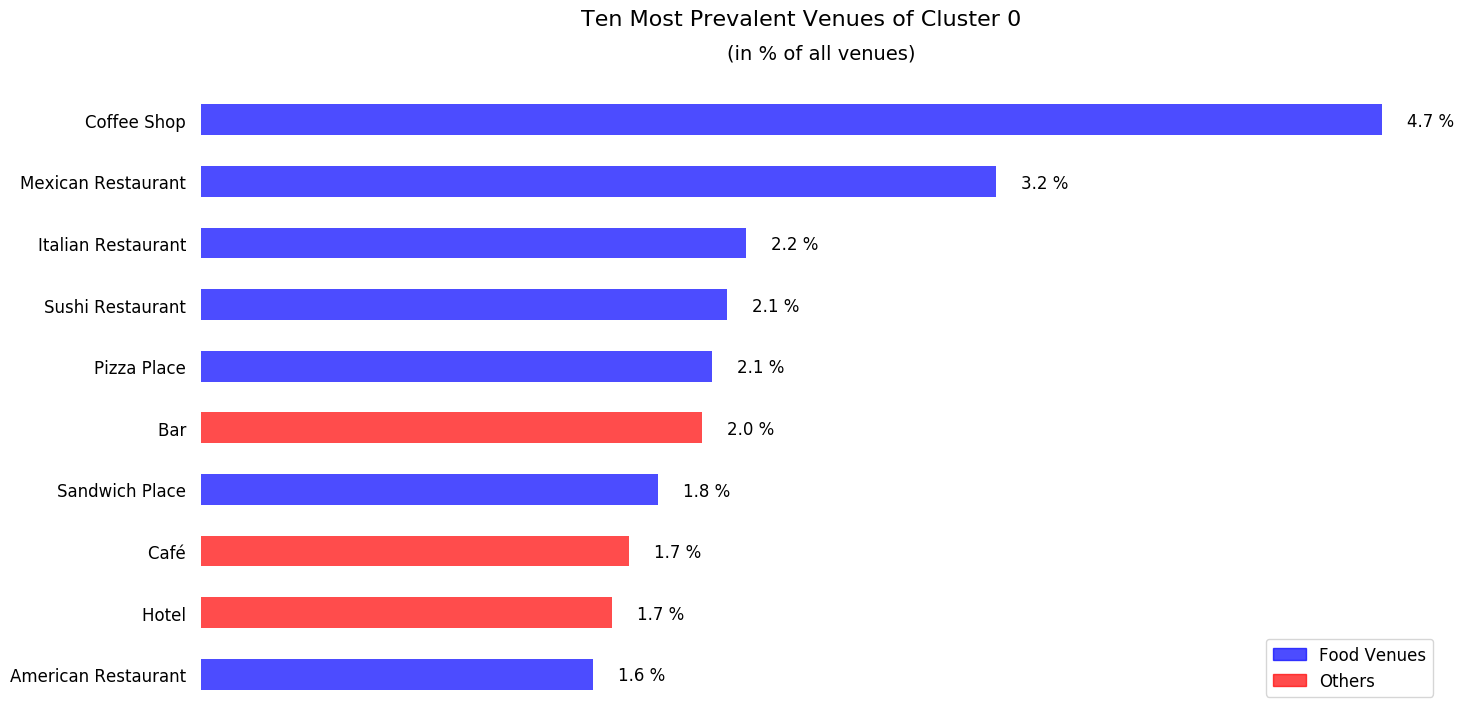

In [115]:
cluster0=pd.DataFrame(la_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)

There are 6 food venues in the top 10 venues of Cluster 0 with Mexican Restaurants making up nearly 20% of all venues. These facts indicate that Cluster 0 would not be the best one to explore further in terms of setting up a new restaurant.


#### *Cluster 1*

Korean Restaurant      Café  Thrift / Vintage Store  \
Cluster 1           0.281319  0.074176                0.071429   

           Japanese Restaurant  Grocery Store  Gas Station  \
Cluster 1             0.051099       0.043407     0.035714   

           Mexican Restaurant  Discount Store  Fast Food Restaurant  \
Cluster 1            0.035714        0.035714              0.035714   

           Pizza Place  Ice Cream Shop  New American Restaurant  Dessert Shop  \
Cluster 1     0.035714        0.023077                 0.015385      0.015385   

           Coffee Shop  Burger Joint  Brazilian Restaurant    Bakery  \
Cluster 1     0.015385      0.015385              0.015385  0.015385   

           Bubble Tea Shop  BBQ Joint  Restaurant  Beer Bar  Smoke Shop  \
Cluster 1         0.015385   0.015385    0.015385  0.007692    0.007692   

           Shabu-Shabu Restaurant  Speakeasy  Clothing Store  Shopping Mall  \
Cluster 1                0.007692   0.007692        0.007692       0.007692   

           Sushi Restaurant  Concert Hall  Convenience Store      Pool  \
Cluster 1          0.007692      0.007692           0.007692  0.007692   

           Movie Theater  Ramen Restaurant  Hookah Bar  Hotel Bar  \
Cluster 1       0.007692          0.007692    0.007692   0.007692   

           Karaoke Bar     Hotel  Juice Bar       Bar  Liquor Store  \
Cluster 1     0.007692  0.007692   0.007692  0.007692           0.0   

           Photography Studio  Pharmacy  Lingerie Store  Mobile Phone Shop  \
Cluster 1                 0.0       0.0             0.0                0.0   

           Pet Store  Piano Bar  Performing Arts Venue  Pawn Shop  Park  \
Cluster 1        0.0        0.0                    0.0        0.0   0.0   

           Lounge  Locksmith  Pilates Studio  Pie Shop  Outdoor Sculpture  \
Cluster 1     0.0        0.0             0.0       0.0                0.0   

           Light Rail Station  Playground  Library  Laundry Service  Plaza  \
Cluster 1                 0.0         0.0      0.0              0.0    0.0   

           Poke Place  Laundromat  Pool Hall  Print Shop  Pub  Public Art  \
Cluster 1         0.0         0.0        0.0         0.0  0.0         0.0   

           Paper / Office Supplies Store  Market  Marijuana Dispensary  \
Cluster 1                            0.0     0.0                   0.0   

           Monument / Landmark  Moroccan Restaurant  Motel  \
Cluster 1                  0.0                  0.0    0.0   

           Miscellaneous Shop  Motorcycle Shop  Middle Eastern Restaurant  \
Cluster 1                 0.0              0.0                        0.0   

           Multiplex  Men's Store  Mediterranean Restaurant  Museum  \
Cluster 1        0.0          0.0                       0.0     0.0   

           Mattress Store  Music Store  Music Venue  Record Shop  \
Cluster 1             0.0          0.0          0.0          0.0   

           Neighborhood  Nightclub  Massage Studio  Noodle House  \
Cluster 1           0.0        0.0             0.0           0.0   

           Martial Arts Dojo  North Indian Restaurant  Office  Opera House  \
Cluster 1                0.0                      0.0     0.0          0.0   

           Optical Shop  Organic Grocery  Other Great Outdoors  \
Cluster 1           0.0              0.0                   0.0   

           Other Repair Shop  Nail Salon  ATM  Recording Studio  \
Cluster 1                0.0         0.0  0.0               0.0   

           Recreation Center  Trail  Toy / Game Store  Tiki Bar  Theme Park  \
Cluster 1                0.0    0.0               0.0       0.0         0.0   

           Theater  Thai Restaurant  Tex-Mex Restaurant  Tea Room  \
Cluster 1      0.0              0.0                 0.0       0.0   

           Tattoo Parlor  Tanning Salon  Taiwanese Restaurant  Tailor Shop  \
Cluster 1            0.0            0.0                   0.0          0.0   

           Taco Place  Szechuan Restaurant  Supplement Shop 

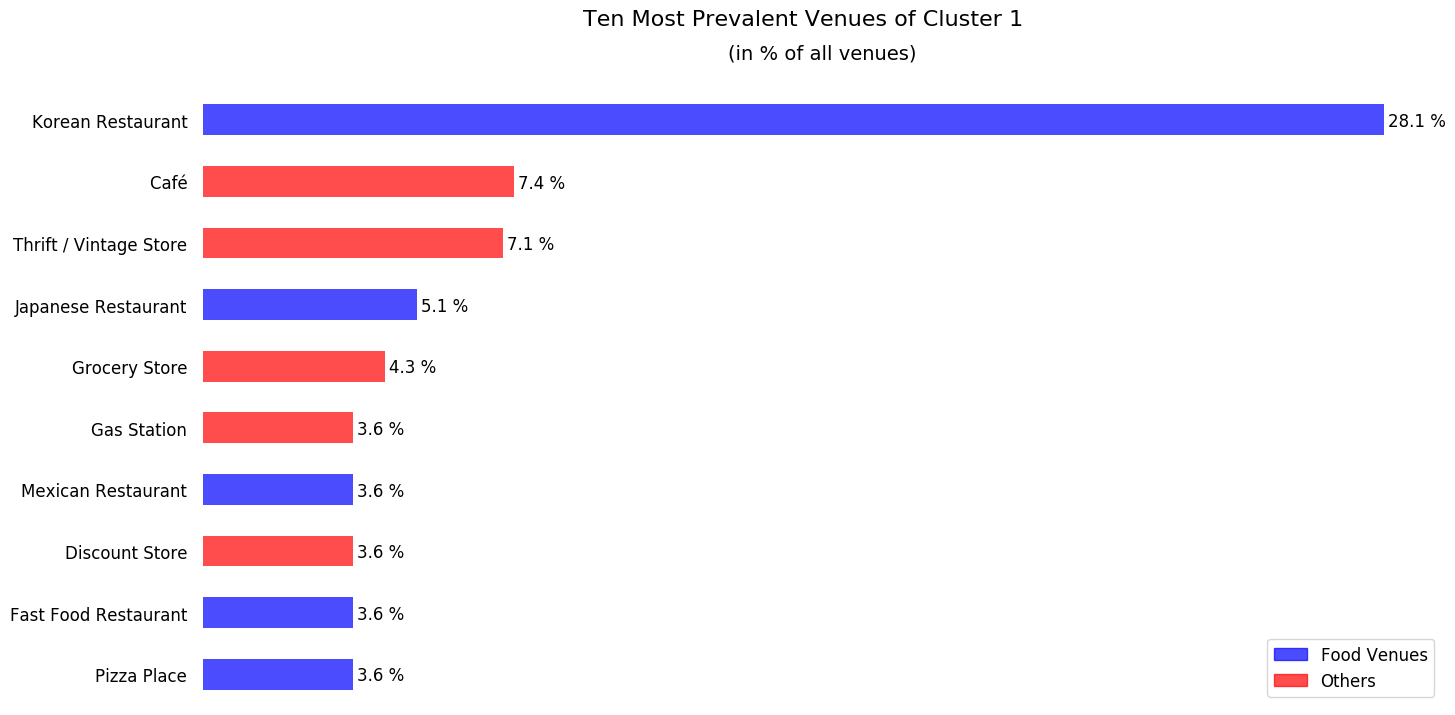

In [116]:
cluster1=pd.DataFrame(la_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

There are 4 food venues in the top 10 venues of Cluster 1 with Korean Restaurants making up a huge majority (nearly 30%) of all venues. This is unsurprising as Cluster 1 consists of only two neighbourhoods, one being Koreatown and the other (Mid-Wilshire) also having a lot of Korean Restaurants. While there are only 4 food venues in the top 10, the complete dominance of Korean Restaurants in the area indicates the fact that Cluster 1 need not be looked into any further.

#### *Cluster 2*

Thai Restaurant      Café  Massage Studio  \
Cluster 2         0.363636  0.055944        0.055944   

           Middle Eastern Restaurant  Juice Bar  Pet Store  Discount Store  \
Cluster 2                   0.043124   0.040793   0.027972        0.027972   

           Sushi Restaurant  Noodle House  Dessert Shop  Strip Club       Bar  \
Cluster 2          0.027972      0.027972      0.027972    0.027972  0.027972   

           Comedy Club  Marijuana Dispensary  Sandwich Place  \
Cluster 2     0.027972              0.027972        0.025641   

           Convenience Store  Cocktail Bar  Gym / Fitness Center  \
Cluster 2           0.015152      0.015152              0.015152   

           Mexican Restaurant      Bank  Fried Chicken Joint  Liquor Store  \
Cluster 2            0.015152  0.012821             0.012821      0.012821   

           Vegetarian / Vegan Restaurant  Department Store  Ice Cream Shop  \
Cluster 2                       0.012821          0.012821        0.012821   

           Yoga Studio  Wine Bar  Paper / Office Supplies Store  \
Cluster 2     0.012821  0.012821                            0.0   

           Other Repair Shop  Other Great Outdoors  Organic Grocery  Park  \
Cluster 2                0.0                   0.0              0.0   0.0   

           Optical Shop  Opera House  Pawn Shop  Performing Arts Venue  \
Cluster 2           0.0          0.0        0.0                    0.0   

           Outdoor Sculpture  ATM  Pharmacy  Photography Studio  Piano Bar  \
Cluster 2                0.0  0.0       0.0                 0.0        0.0   

           Pie Shop  Office  Pizza Place  Playground  Plaza  Poke Place  Pool  \
Cluster 2       0.0     0.0          0.0         0.0    0.0         0.0   0.0   

           Pool Hall  Print Shop  Pub  Public Art  Pilates Studio  \
Cluster 2        0.0         0.0  0.0         0.0             0.0   

           Music Store  North Indian Restaurant  Library  Martial Arts Dojo  \
Cluster 2          0.0                      0.0      0.0                0.0   

           Market  Lounge  Locksmith  Lingerie Store  Light Rail Station  \
Cluster 2     0.0     0.0        0.0             0.0                 0.0   

           Laundry Service  Nightclub  Laundromat  Latin American Restaurant  \
Cluster 2              0.0        0.0         0.0                        0.0   

           Korean Restaurant  Kids Store  Karaoke Bar  Jewelry Store  \
Cluster 2                0.0         0.0          0.0            0.0   

           Mattress Store  Mediterranean Restaurant  Men's Store  \
Cluster 2             0.0                       0.0          0.0   

           Miscellaneous Shop  Mobile Phone Shop  Monument / Landmark  \
Cluster 2                 0.0                0.0                  0.0   

           Moroccan Restaurant  Motel  Motorcycle Shop  Movie Theater  \
Cluster 2                  0.0    0.0              0.0            0.0   

           Multiplex  Museum  Record Shop  Music Venue  Nail Salon  \
Cluster 2        0.0     0.0          0.0          0.0         0.0   

           Neighborhood  New American Restaurant  Ramen Restaurant  Rock Club  \
Cluster 2           0.0                      0.0               0.0        0.0   

           Recording Studio  Recreation Center  Thrift / Vintage Store  \
Cluster 2               0.0                0.0                     0.0   

           Theme Park  Theater  Tex-Mex Restaurant  Tea Room  Tattoo Parlor  \
Cluster 2         0.0      0.0                 0.0       0.0            0.0   

           Tanning Salon  Taiwanese Restaurant  Tailor Shop  Taco Place  \
Cluster 2            0.0                   0.0          0.0         0.0   

           Szechuan Restaurant  Supplement Shop  Supermarket  Steakhouse  \
Cluster 2                  0.0              0.0          0.0         0.0   

           Stationery Store  Tiki Bar  Toy / Game Store  Trail  Video Store  \
Cluster 2               0.0       0.0               0.0 

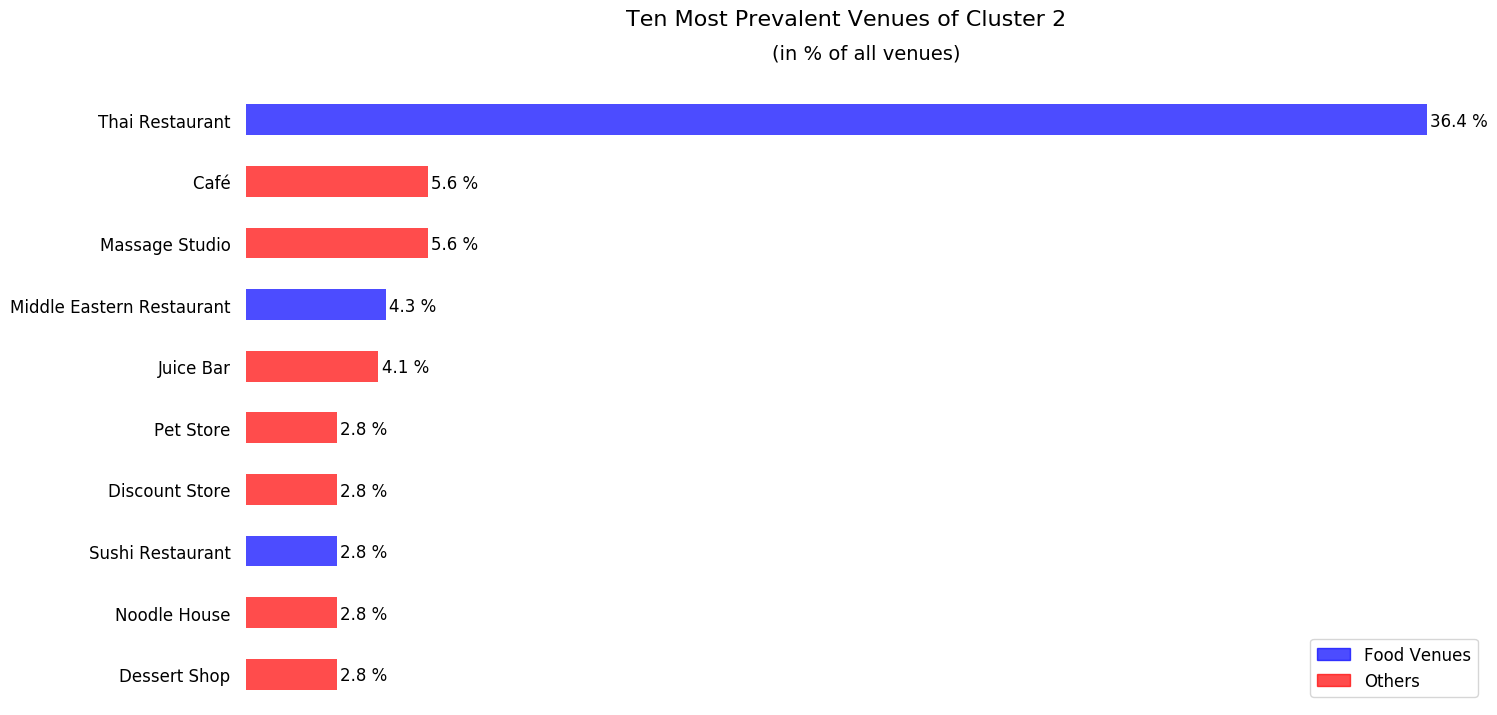

In [117]:
cluster2=pd.DataFrame(la_results.iloc[2,0:-1]).transpose()
cluster2.sort_values(by='Cluster 2',axis=1,ascending=False,inplace=True)
cluster2.rename(columns={'Residential Building (Apartment / Condo)': 'Apartment / Condo'},inplace=True)
display(cluster2)

clus2=cluster2.iloc[0,9::-1]
generate_plot(clus2,2)

There are only 2 food venues in the top 10 venues of Cluster 2. To add to that, the two venues are Food Trucks and Coffee Shops as opposed to proper restaurants. There are a lot of public venues in this cluster - venues that see a lot of footfall such as parks, museums, gyms and department stores. The presence of condominium complexes in this list also suggest that the population per square unit of these neighbourhoods is high. All of these observations point in the direction of Cluster 2 being nominated as the cluster to explore further.

Having said that, the decision to explore Cluster 2 can only be confirmed after examining Cluster 3: -

#### *Cluster 3*

Fast Food Restaurant  Pizza Place  Mexican Restaurant  \
Cluster 3              0.047448      0.04028            0.036843   

           Sandwich Place  Grocery Store  Food Truck  Convenience Store  \
Cluster 3        0.034101       0.032673    0.032102           0.031641   

           Donut Shop      Park  Pharmacy    Bakery  Burger Joint  \
Cluster 3    0.031381  0.027515  0.024889  0.021842      0.020403   

           Chinese Restaurant  Intersection  Fried Chicken Joint  Restaurant  \
Cluster 3            0.019916      0.017986              0.01788    0.017154   

           Mobile Phone Shop  American Restaurant     Bank  Cosmetics Shop  \
Cluster 3           0.016907             0.015857  0.01556        0.015142   

               Café  Latin American Restaurant  Liquor Store     Food  \
Cluster 3  0.014798                   0.014417      0.014047  0.01335   

           Video Store  Korean Restaurant  Clothing Store  Ice Cream Shop  \
Cluster 3     0.012968           0.011755        0.011353        0.010231   

           Art Gallery  Supermarket  Discount Store  Gym / Fitness Center  \
Cluster 3     0.010071     0.009114         0.00893                0.0088   

           Asian Restaurant  Taco Place  Filipino Restaurant  Music Venue  \
Cluster 3          0.008691    0.008549             0.008249     0.007823   

           Shoe Store  Historic Site  Department Store  Sushi Restaurant  \
Cluster 3    0.007703       0.007001          0.006812          0.006359   

           Shipping Store  Seafood Restaurant  Thai Restaurant  \
Cluster 3        0.006141             0.00587          0.00586   

           South American Restaurant  Gas Station       Gym  \
Cluster 3                   0.005567     0.005439  0.005436   

           Rental Car Location     Hotel   Theater  Hot Dog Joint  \
Cluster 3             0.005423  0.005365  0.005133        0.00505   

           Paper / Office Supplies Store  Fish Market  Light Rail Station  \
Cluster 3                       0.004968     0.004926            0.004789   

           Other Great Outdoors  Art Museum  \
Cluster 3              0.004762    0.004598   

           Residential Building (Apartment / Condo)  Laundromat  \
Cluster 3                                  0.004598    0.004598   

           Breakfast Spot  Coffee Shop    Museum  Playground      ATM  \
Cluster 3        0.004515     0.004468  0.004215    0.004215  0.00421   

           BBQ Joint  Shopping Mall  Arts & Crafts Store     Bar  \
Cluster 3   0.004195       0.004001             0.003944  0.0039   

           Automotive Shop  Southern / Soul Food Restaurant  Deli / Bodega  \
Cluster 3         0.003678                         0.003653       0.003483   

           Middle Eastern Restaurant  Accessories Store  Home Service  \
Cluster 3                   0.003352            0.00314      0.003135   

           Indie Movie Theater  Movie Theater  Waterfront  Pet Store  \
Cluster 3             0.003135       0.003135    0.003135   0.003028   

           Caribbean Restaurant  Sculpture Garden  Construction & Landscaping  \
Cluster 3              0.003014          0.002874                    0.002874   

           Women's Store  Dance Studio  Bus Station  Japanese Restaurant  \
Cluster 3       0.002874      0.002874     0.002836             0.002756   

           Furniture / Home Store  Lingerie Store  Bookstore  Wings Joint  \
Cluster 3                0.002754        0.002667   0.002484     0.002483   

               Pool     Diner  Flower Shop  Speakeasy  Cupcake Shop    Market  \
Cluster 3  0.002463  0.002463     0.002299   0.002299      0.002278  0.002155   

           Sporting Goods Shop  Gluten-free Restaurant  Video Game Store  \
Cluster 3             0.002155                0.002155           0.00203   

           Supplement Shop  Massage Studio  Bubble Tea Shop  \
Cluster 3          0.00203        0.002028         0.002028   

           Eastern European Restaurant  Hardware Store  Kids Store  \


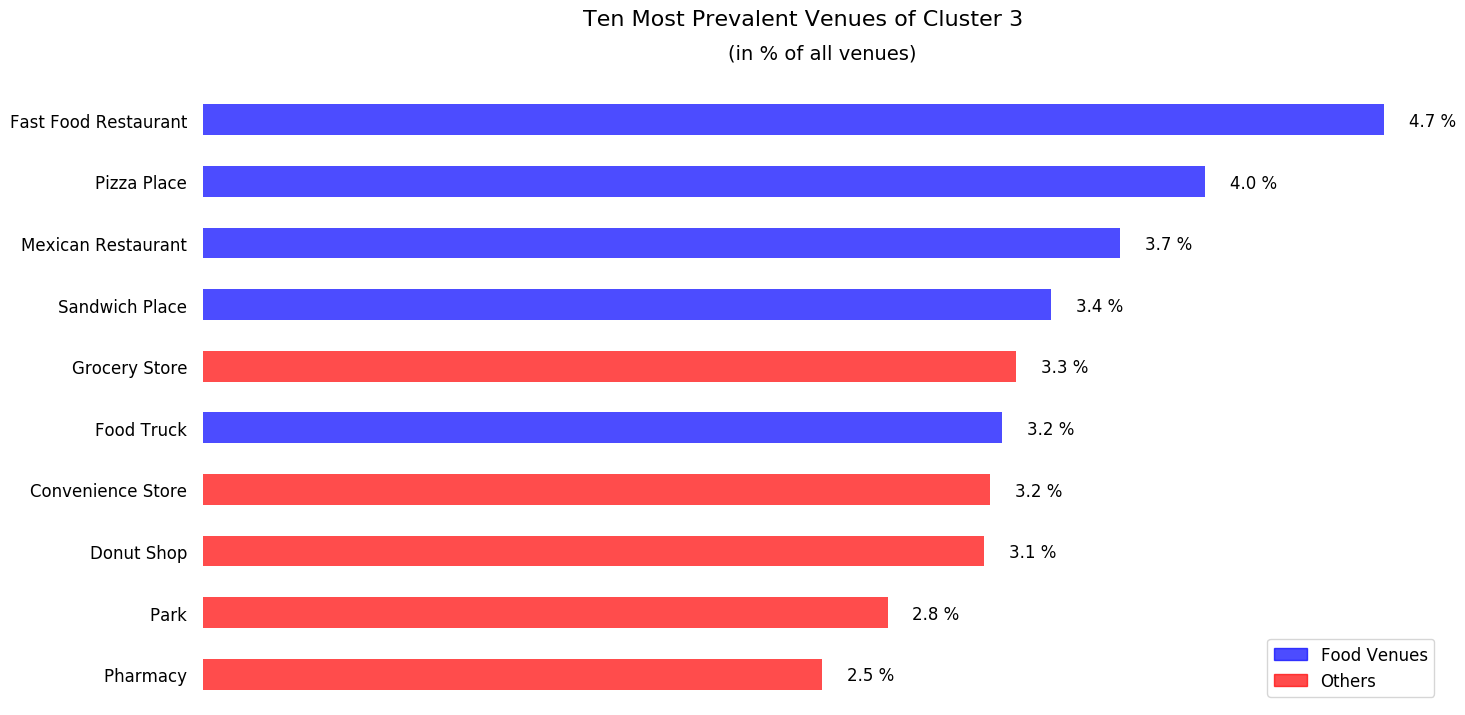

In [118]:
cluster3=pd.DataFrame(la_results.iloc[3,0:-1]).transpose()
cluster3.sort_values(by='Cluster 3',axis=1,ascending=False,inplace=True)
display(cluster3)

clus3=cluster3.iloc[0,9::-1]
generate_plot(clus3,3)

There are 8 food venues in the top 10 venues of Cluster 1 which is huge percentage. Except for the number 1 venue (Coffee Shops), all other food venues are proper restaurants. This clearly indicates that the neighbourhoods in Cluster 3 are saturated with restaurants already and need not be considered when opening a new restaurant.

It is now safe to confirm the decision of investigating **Cluster 2** further and eliminating all other clusters.

In [101]:
clus1neigh=la_merged.loc[la_merged['Cluster Label'] == 1, la_merged.columns[0]].values.tolist()
clus1neigh

['Harvard Heights', 'Koreatown']

In [102]:
filtered_nhoods=nhoods.copy()

for i in range(0,len(filtered_nhoods)):

    if filtered_nhoods.iloc[i,0] not in clus1neigh:
        filtered_nhoods.iloc[i,0]='TO DROP'

In [103]:
filtered_nhoods=filtered_nhoods[filtered_nhoods.Neighbourhood!='TO DROP']
filtered_nhoods.reset_index(drop=True,inplace=True)

The neighbourhoods in Cluster 2 along with their coordinates: -

In [104]:
filtered_nhoods

Neighbourhood   Latitude   Longitude
0  Harvard Heights  34.047111 -118.305483
1        Koreatown  34.061734 -118.305373

Function to obtain and display the closest Italian restaurants from each neighbourhood in Cluster 2 and the corresponding distances: -

In [105]:
def get_neighbourhood_Greek_Restaurant(url1):
    
    results = requests.get(url1).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a data frame
    dataframe = json_normalize(venues)

    #print('DataFrame',dataframe)
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    #print('Filtered columns',filtered_columns)
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    display(dataframe_filtered.loc[:,['name','categories','distance','lat','lng']])
    

In [106]:
category='4bf58dd8d48988d10e941735'#The category for Greek restaurants obtained from https://developer.foursquare.com/docs/resources/categories
radius = 700
LIMIT=30

In [107]:
for n in range(0,len(filtered_nhoods)):
    url = 'http://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    filtered_nhoods.iloc[n,1], 
    filtered_nhoods.iloc[n,2], 
    VERSION, 
    category, 
    radius, 
    LIMIT)
    print('------------------------------------------------- '+ filtered_nhoods.iloc[n,0] + ' -------------------------------------------------')
    get_neighbourhood_Greek_Restaurant(url)
    print('\n\n')

------------------------------------------------- Harvard Heights -------------------------------------------------


name        categories  distance  \
0  Papa Cristo's Catering & Greek Taverna  Greek Restaurant       538   
1         Ali Ranas Baklava and Gyro cart  Greek Restaurant       310   
2       Hidden LA's Big Fat Greek Tuesday  Greek Restaurant       530   

         lat         lng  
0  34.047377 -118.299649  
1  34.049600 -118.307000  
2  34.047355 -118.299735




------------------------------------------------- Koreatown -------------------------------------------------


name        categories  distance        lat         lng
0  Sizzling Kabob  Greek Restaurant       434  34.061834 -118.300668

Neighbourhood   Latitude   Longitude
0  Harvard Heights  34.047111 -118.305483
1        Koreatown  34.061734 -118.305373

Computing the distance of each neighbourhood from the center of LA and adding it as a column to the existing data frame: -

In [109]:
filter2_nhoods = filter2_nhoods.reindex( columns = filter2_nhoods.columns.tolist() + ['Distance from LA center (in km)'])  #this way to avoid warnings

In [110]:
from math import radians, sin, cos, acos

slat = radians(34.0536909) #LA center Latitude obtained earlier
slon = radians(-118.2427666) #LA center Longitude obtained earlier

In [111]:
for n in range(0,len(filter2_nhoods)):
    
    elat = radians(filter2_nhoods.iloc[n,1])
    elon = radians(filter2_nhoods.iloc[n,2])

    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    filter2_nhoods.loc[n,'Distance from LA center (in km)']=dist

In [62]:
filter2_nhoods.sort_values(by='Distance from LA center (in km)',inplace=True)
filter2_nhoods.reset_index(drop=True,inplace=True)
filter2_nhoods

Neighbourhood   Latitude   Longitude  Distance from LA center (in km)
0  Harvard Heights  34.047111 -118.305483                         5.824201
1        Koreatown  34.061734 -118.305373                         5.836395

### Web Scraping Rent Data  <a name="rent"></a>

The list of average rent of all neighbourhoods in LA can be obtained by scraping the relevant webpage. The data in the webpage is in the form of a table. Therefore, the data can be obtained much more easily.

In [63]:
url = requests.get('https://www.rentcafe.com/average-rent-market-trends/us/ca/los-angeles/').text
soup = BeautifulSoup(url,"html.parser")

In [64]:
table = soup.find('table',id="MarketTrendsAverageRentTable")
pr = table.find_all('td')
nh = table.find_all('th')

In [65]:
price = []
neighbourhood = []

for i in range(0, len(pr)):
    price.append(pr[i].text.strip())
    neighbourhood.append(nh[i+2].text.strip())
        
df_rent = pd.DataFrame(data=[neighbourhood, price]).transpose()
df_rent.columns = ['Neighbourhood', nh[1].text]
df_rent.loc[32,'Neighbourhood']='Montecito Heights' #Correcting a spelling error
df_rent

Neighbourhood Average Rent
0              Jefferson Park       $1,355
1                   El Sereno       $1,396
2               Vermont Vista       $1,445
3              Vermont Knolls       $1,445
4                   Hyde Park       $1,484
5               Glassell Park       $1,485
6                Cypress Park       $1,485
7                    Winnetka       $1,526
8                     Sunland       $1,571
9                Leimert Park       $1,575
10              Mission Hills       $1,580
11              Panorama City       $1,591
12                 Sun Valley       $1,599
13          Arlington Heights       $1,605
14               Shadow Hills       $1,607
15            Harvard Heights       $1,607
16                North Hills       $1,613
17                    Pacoima       $1,629
18                     Arleta       $1,634
19          Vermont - Slauson       $1,639
20                     Reseda       $1,678
21           Mount Washington       $1,719
22                    Tarzana       $1,736
23          Manchester Square       $1,738
24               Harvard Park       $1,738
25              Gramercy Park       $1,738
26        Chesterfield Square       $1,738
27                   Van Nuys       $1,757
28           Montecio Heights       $1,765
29   Baldwin Hills - Crenshaw       $1,780
30          Lake View Terrace       $1,793
31                 West Hills       $1,806
32          Montecito Heights       $1,815
33                Lake Balboa       $1,822
34                     Sylmar       $1,825
35                 West Adams       $1,846
36              Boyle Heights       $1,847
37             Vermont Square       $1,877
38                 South Park       $1,877
39                 Northridge       $1,894
40              Highland Park       $1,906
41                 Chatsworth       $1,907
42                Canoga Park       $1,922
43              Granada Hills       $1,926
44                 Eagle Rock       $1,947
45                  Koreatown       $1,970
46                     Encino       $2,007
47             Windsor Square       $2,014
48            Lincoln Heights       $2,016
49            North Hollywood       $2,024
50               Porter Ranch       $2,031
51                  Los Feliz       $2,060
52               Sherman Oaks       $2,062
53             East Hollywood       $2,077
54             Elysian Valley       $2,088
55                   Westlake       $2,122
56            Atwater Village       $2,138
57                  Larchmont       $2,140
58              Griffith Park       $2,180
59                   Mid-City       $2,188
60                Silver Lake       $2,198
61           Pico - Robertson       $2,247
62             Woodland Hills       $2,286
63                  Echo Park       $2,301
64                Studio City       $2,351
65            Hollywood Hills       $2,380
66             Valley Village       $2,399
67                Beverlywood       $2,400
68                Toluka Lake       $2,400
69                      Palms       $2,407
70                  Hollywood       $2,485
71               Elysian Park       $2,501
72               Hancock Park       $2,519
73       Hollywood Hills West       $2,529
74                  Chinatown       $2,530
75               Sunkist Park       $2,536
76             Studio Village       $2,536
77                  Park West       $2,536
78                  Fox Hills       $2,536
79      Blanco - Culver Crest       $2,536
80                Rancho Park       $2,605
81              Cheviot Hills       $2,605
82       Downtown Los Angeles       $2,649
83               Mid-Wilshire       $2,681
84              Playa del Rey       $2,723
85                 McLaughlin       $2,727
86                Westchester       $2,788
87                  Mar Vista       $2,809
88                  Park East       $2,830
89                  Jefferson       $2,830
90                  Clarkdale       $2,830
91                Blair Hills       $2,830
92           West

The above data frame is already in ascending order of average rent.

In [66]:
df_rent[(df_rent['Neighbourhood']=='Harvard Heights') | (df_rent['Neighbourhood']=='Korea Town')]

Neighbourhood Average Rent
15  Harvard Heights       $1,607

The average rent in **Harvard Heights** is $1610 which is comparatively much cheapear in the list. It is is also close to the center of Los Angeles